In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Leitura dos dados

In [3]:
df = pd.read_csv("drive/MyDrive/csvs/diabetes_prediction_dataset.csv")
columns = df.columns

# Vizualizando os dados

Classe: Diabetes

Atributos: gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level

In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Conversão de valores categóricos para numéricos

In [5]:
target = ['gender', 'smoking_history']
for i in target:
    encoder = LabelEncoder()
    encoder.fit(list(df[i]))
    df[i] = encoder.fit_transform(df[i])

In [6]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


# Verificando se há missing values

In [7]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# Normalizando o dataframe

In [8]:
scaler = MinMaxScaler()
norm = scaler.fit_transform(df)
dataset = pd.DataFrame(norm, columns=columns)

# Gaussian

## Definição da classe e das features

In [9]:
x = dataset[['gender', 'age', 'smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level']]
y = dataset['diabetes']

## Divisão dos dados em conjuntos de treinamento e teste

2/3 dos dados para treino e 1/3 para teste

In [10]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=1/3, random_state=42)

In [18]:
naiveBayes = GaussianNB()
naiveBayes.fit(xTrain, yTrain)

yPredNB = naiveBayes.predict(xTest)
accNB = accuracy_score(yPredNB, yTest)
print(f'Accuracy: {accNB}')

Accuracy: 0.9559008819823603


Matriz de confusão

<Axes: >

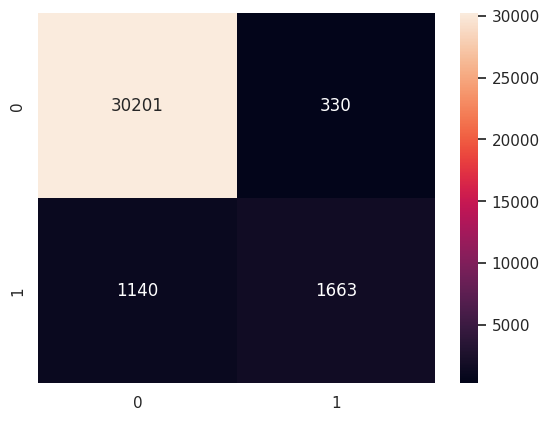

In [22]:
cm = confusion_matrix(yTest, naiveBayes.predict(xTest))
sns.heatmap(cm, annot=True, fmt="d")

# Seleção de Recursos Univariados

Encontrar as 4 melhores features

In [29]:
features = SelectKBest(chi2, k=4).fit(xTrain, yTrain)

In [30]:
for index in range(len(features.scores_)):
  print(f'{xTrain.columns[index]}: {features.scores_[index]}')

gender: 20.393287619401715
age: 676.7978952957852
smoking_history: 192.14349637218297
bmi: 87.5256053512455
HbA1c_level: 1123.4462845897483
blood_glucose_level: 1547.1486549954302


In [31]:
xTrain2 = features.transform(xTrain)
xTest2 = features.transform(xTest)

In [32]:
naiveBayes = GaussianNB().fit(xTrain2, yTrain)
yPredNB = naiveBayes.predict(xTest2)

In [33]:
accNB = accuracy_score(yTest, yPredNB)
print(f'Accuracy: {accNB}')

Accuracy: 0.9561108777824443


Matriz de confusão

<Axes: >

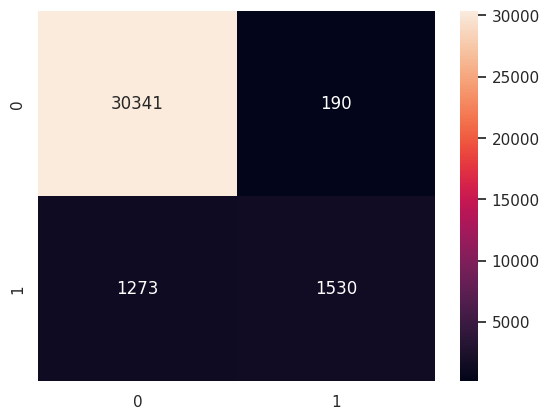

In [28]:
cm = confusion_matrix(yTest, naiveBayes.predict(xTest2))
sns.heatmap(cm, annot=True, fmt="d")

# Bernoulli
### O modelo Bernoulli assume que as variáveis de entrada são binárias

In [34]:
x = dataset[['hypertension', 'heart_disease']]
y = dataset['diabetes']

In [35]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=1/3, random_state=42)

In [38]:
naiveBayes = BernoulliNB().fit(xTrain, yTrain)
yPredNB = naiveBayes.predict(xTest)

In [39]:
accNB = accuracy_score(yPredNB, yTest)
print(f'Accuracy: {accNB}')

Accuracy: 0.9144117117657646


<Axes: >

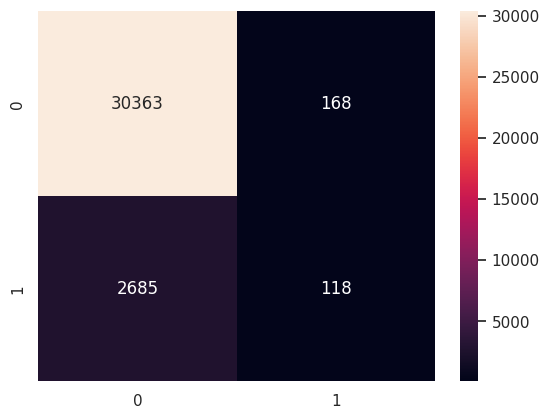

In [40]:
cm = confusion_matrix(yTest,yPredNB)
sns.heatmap(cm, annot=True, fmt="d")